In [107]:
import glob
import pandas as pd

listOfFileNames = []
listOfClassNames = []
listOfDataPerClass = []
files = []
classNames = []

files = glob.glob("/Users/user/Desktop/FSL by non-signers/ano/2/*.csv")
print(len(files))
listOfFileNames = []
for f in files:
    listOfFileNames.append(f.split("\\")[1])
    
emgDataFrames = {}
emgDataFrames['right'] = []
emgDataFrames['left'] = []
    
accDataFrames = {}
accDataFrames['right'] = []
accDataFrames['left'] = []

gyroDataFrames = {}
gyroDataFrames['right'] = []
gyroDataFrames['left'] = []

dataFrameDictionary = {}
leftctr = 0
rightctr = 0
for fileName in listOfFileNames:
    fileLocation = "/Users/user/Desktop/FSL by non-signers/ano/2/"+fileName 
    #print(fileLocation)
    df = pd.read_csv(fileLocation)
    
    if "emg" in fileName:   
        if "-0-" in fileName:
            emgDataFrames['right'].append(df)
            leftctr+=1
        else:
            emgDataFrames['left'].append(df)
            rightctr+=1
    elif ("accelerometer") in fileName:
        if "-0-" in fileName:
            accDataFrames['right'].append(df)
            leftctr+=1
        else:
            accDataFrames['left'].append(df)
            rightctr+=1
    elif ("gyro") in fileName:
        if "-0-" in fileName:
            gyroDataFrames['right'].append(df)
            leftctr+=1
        else:
            gyroDataFrames['left'].append(df)      
            rightctr+=1

print("Total of " + str(leftctr) + " left arm files and " + str(rightctr) + " right arm files.")

    
#listOfClassNames
#listOfDataPerClass[0]
print("Done listing the class and file names")

50
Total of 15 left arm files and 15 right arm files.
Done listing the class and file names


In [108]:
trimmedAccDataFrames = {}
trimmedAccDataFrames['right'] = []
trimmedAccDataFrames['left'] = []

trimmedGyroDataFrames = {}
trimmedGyroDataFrames['right'] = []
trimmedGyroDataFrames['left'] = []

for i in range(0,len(gyroDataFrames['right'])):
    start = -1
    end = -1
    counter = 0
    for x in accDataFrames['right'][i]['x']:  
        if(x < 0.85 and start ==-1):
            print(x)
            start = counter - 10
        elif(start != -1 and x>0.99):
            end = counter + 9
            break;
        counter += 1

    newAccDf = accDataFrames['right'][i].loc[start:end]
    newAccDf = newAccDf.reset_index(drop=True)
    newGyroDf = gyroDataFrames['right'][i].loc[start:end]
    newGyroDf = newGyroDf.reset_index(drop=True)

    trimmedAccDataFrames['right'].append(newAccDf)
    trimmedGyroDataFrames['right'].append(newGyroDf)

    print("Start index: %s End index: %s" % (start, end))


0.762695
Start index: 23 End index: 116
0.84668
Start index: 5 End index: 123
0.832031
Start index: 8 End index: 137
0.842773
Start index: 12 End index: 134
0.841797
Start index: 12 End index: 145


-----1------
Untrimmed


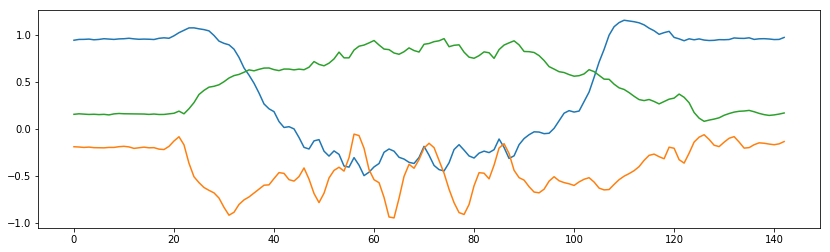

Trimmed


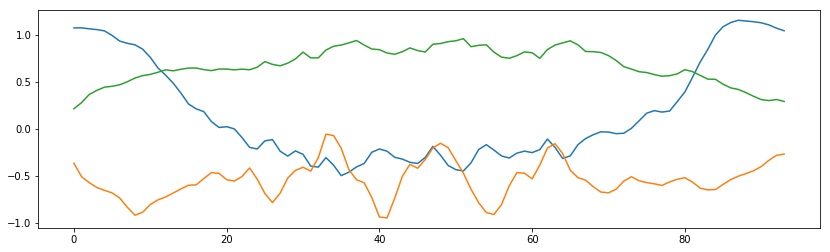

-----2------
Untrimmed


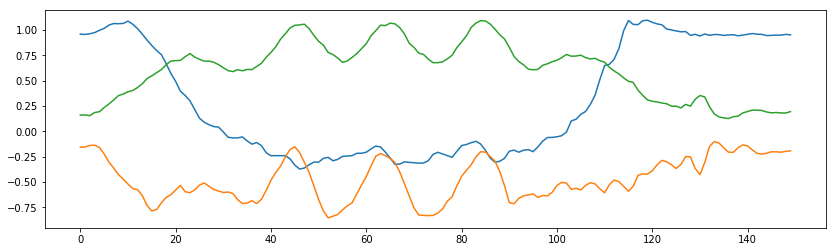

Trimmed


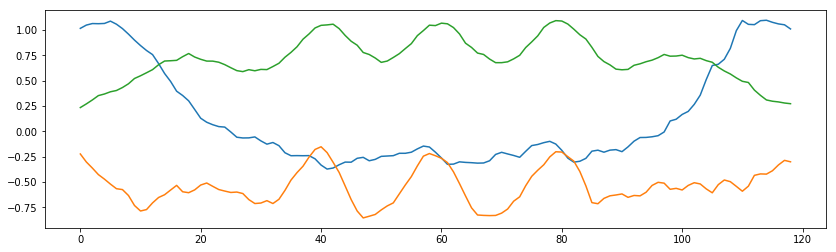

-----3------
Untrimmed


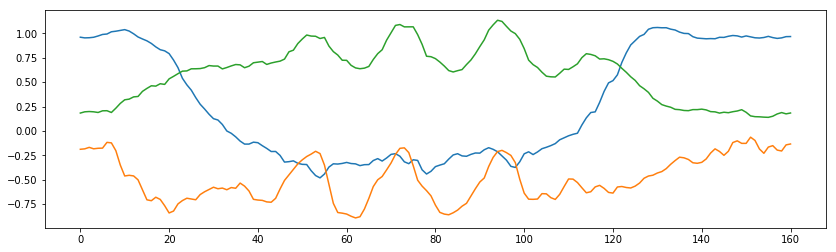

Trimmed


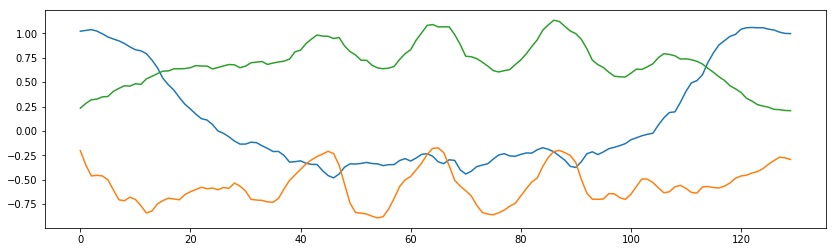

-----4------
Untrimmed


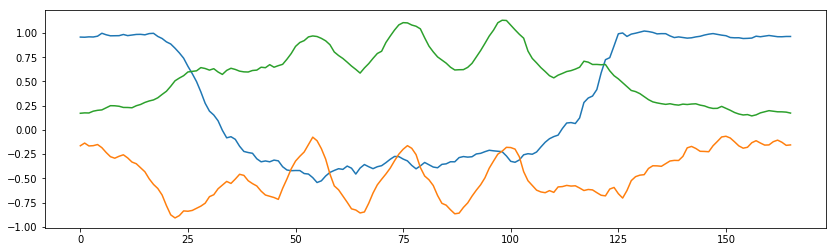

Trimmed


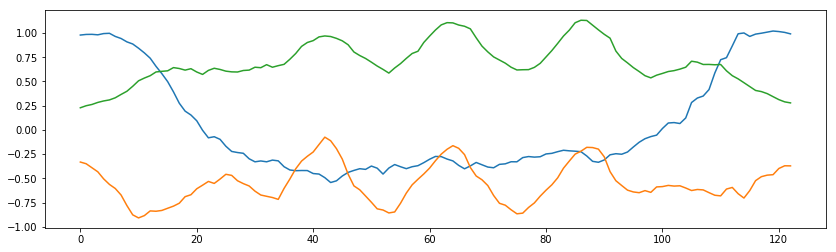

-----5------
Untrimmed


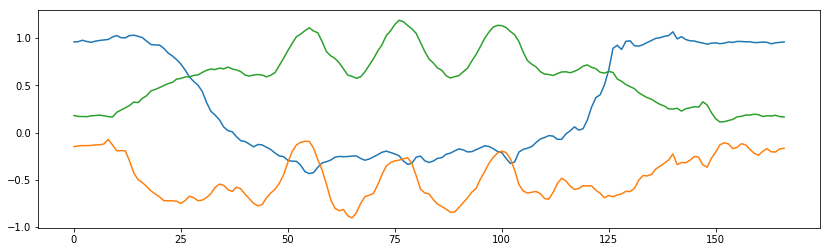

Trimmed


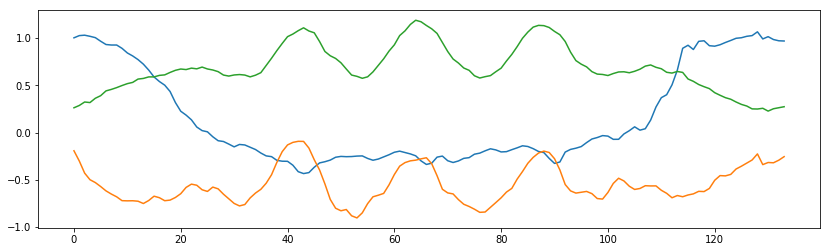

In [112]:
import matplotlib.pyplot as plt

for i in range(0,len(trimmedAccDataFrames['right'])):
    print("-----%s------" % str(i+1))
    print("Untrimmed")

    fig_size = plt.rcParams["figure.figsize"]    
    fig_size[0] = 14
    fig_size[1] = 4
    plt.rcParams["figure.figsize"] = fig_size
    plt.plot(accDataFrames['right'][i]['x'])
    plt.plot(accDataFrames['right'][i]['y'])
    plt.plot(accDataFrames['right'][i]['z'])

    plt.show()
    print("Trimmed")

    fig_size = plt.rcParams["figure.figsize"]    
    fig_size[0] = 14
    fig_size[1] = 4
    plt.rcParams["figure.figsize"] = fig_size
    plt.plot(trimmedAccDataFrames['right'][i]['x'])
    plt.plot(trimmedAccDataFrames['right'][i]['y'])
    plt.plot(trimmedAccDataFrames['right'][i]['z'])
    plt.show()

In [81]:
# import numpy as np

# start = -1
# end = -1
# counter = 0
# for x in accDataFrames['right'][1]['x']:  
#     mean = np.mean(accDataFrames['right'][0]['x'].loc[0:counter])
#     sd = np.std(accDataFrames['right'][0]['x'].loc[0:counter])*4
#     print("n: %s mean: %s sd: %s mean+sd = %s" % (accDataFrames['right'][0]['x'][counter], mean, sd, mean+sd))
    
#     if(counter>0):
#         if(accDataFrames['right'][1]['y'][counter+1] < (mean-sd)):
#             print(counter+1)
#             break;
#     counter +=1
    


In [44]:
newdf

,timestamp,x,y,z
41,1528178529418302,0.775879,-0.615723,0.703125
42,1528178529439252,0.686035,-0.593750,0.731445
43,1528178529457199,0.583496,-0.593750,0.736816
44,1528178529478131,0.492188,-0.658203,0.762695
45,1528178529499076,0.476074,-0.673828,0.777832
46,1528178529517038,0.417969,-0.698242,0.800293
47,1528178529545949,0.325195,-0.659180,0.787598
48,1528178529559920,0.262695,-0.655762,0.798340
49,1528178529576868,0.207031,-0.664551,0.794434
50,1528178529599807,0.163086,-0.650391,0.805176
